In [30]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [31]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [32]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [33]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

39.600604873537804 77.40262136165092
-83.18818352246473 118.0893965825772
-74.54931573174704 55.57487557608761
68.54012465981921 -100.00108427333828
9.196104849015185 83.5473870741672
-43.10363944373788 162.12821775883856
69.24841439013235 -68.11567761097089
-73.4462623683547 178.93913457798487
40.60311461733136 -113.10337037153411
26.174242055264216 66.04239107597132
-30.808922247995362 -143.07839631398767
44.72565953581136 -154.24616556810057
68.8690682353087 46.08262529954504
-13.642264134114527 -75.47354553532023
-75.74724086247612 112.35601147968475
39.237269477452855 -3.8427772210270064
-57.70810821966904 -39.066864929132606
-77.39259459418423 -39.29926810593355
-18.58945013153017 31.225103735013022
-32.81710993384835 -126.42386361545272
-27.462334509859367 -12.990528033141373
-33.31513490464554 171.48408821003977
84.8097533229197 -133.2165438530036
-11.33367311366024 150.7805497341103
-64.92305426919756 103.00048522368263
-35.668312361670004 54.939893736952286
62.66182220790378 

In [34]:
from citipy import citipy

In [35]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [36]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [37]:
import requests
requests.__version__

'2.27.1'

In [38]:
# Import the API key.
from config import weather_api_key

In [39]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b5881243b90ce009f5661443f3f8a00


In [42]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | shache
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | east london
Processing Record 4 of Set 1 | thompson
Processing Record 5 of Set 1 | batticaloa
Processing Record 6 of Set 1 | te anau
Processing Record 7 of Set 1 | clyde river
Processing Record 8 of Set 1 | kaitangata
Processing Record 9 of Set 1 | tooele
Processing Record 10 of Set 1 | bela
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | kodiak
Processing Record 13 of Set 1 | mezen
Processing Record 14 of Set 1 | san juan bautista
Processing Record 15 of Set 1 | villarrubia de los ojos
Processing Record 16 of Set 1 | mar del plata
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | marondera
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | ahipara
Processing Record 22 of Set 1 | tuktoyaktuk
Processing Record 23 of

Processing Record 40 of Set 4 | lompoc
Processing Record 41 of Set 4 | kashi
Processing Record 42 of Set 4 | aquiraz
Processing Record 43 of Set 4 | gloucester
Processing Record 44 of Set 4 | itarema
Processing Record 45 of Set 4 | louisbourg
City not found. Skipping...
Processing Record 46 of Set 4 | nanakuli
Processing Record 47 of Set 4 | mocambique
City not found. Skipping...
Processing Record 48 of Set 4 | tara
Processing Record 49 of Set 4 | ballina
Processing Record 50 of Set 4 | linkou
Processing Record 1 of Set 5 | atmakur
Processing Record 2 of Set 5 | borogontsy
Processing Record 3 of Set 5 | toppenish
Processing Record 4 of Set 5 | aksarka
Processing Record 5 of Set 5 | visakhapatnam
Processing Record 6 of Set 5 | zhanakorgan
Processing Record 7 of Set 5 | san patricio
Processing Record 8 of Set 5 | qaqortoq
Processing Record 9 of Set 5 | bandarbeyla
Processing Record 10 of Set 5 | thinadhoo
Processing Record 11 of Set 5 | staraya toropa
Processing Record 12 of Set 5 | zhan

Processing Record 26 of Set 8 | sao borja
Processing Record 27 of Set 8 | kahului
Processing Record 28 of Set 8 | rafraf
Processing Record 29 of Set 8 | beringovskiy
Processing Record 30 of Set 8 | shimoda
Processing Record 31 of Set 8 | balykshi
Processing Record 32 of Set 8 | caravelas
Processing Record 33 of Set 8 | kalmunai
Processing Record 34 of Set 8 | imbituba
Processing Record 35 of Set 8 | mugur-aksy
Processing Record 36 of Set 8 | kamalasai
Processing Record 37 of Set 8 | waipawa
Processing Record 38 of Set 8 | umm lajj
Processing Record 39 of Set 8 | scarborough
Processing Record 40 of Set 8 | tobermory
Processing Record 41 of Set 8 | luganville
Processing Record 42 of Set 8 | dabola
Processing Record 43 of Set 8 | matagami
Processing Record 44 of Set 8 | henties bay
Processing Record 45 of Set 8 | lusaka
Processing Record 46 of Set 8 | kruisfontein
Processing Record 47 of Set 8 | tyrma
Processing Record 48 of Set 8 | talcahuano
Processing Record 49 of Set 8 | marataizes
Pr

Processing Record 7 of Set 12 | manggar
Processing Record 8 of Set 12 | tyler
Processing Record 9 of Set 12 | mount pleasant
Processing Record 10 of Set 12 | timmins
Processing Record 11 of Set 12 | neyshabur
Processing Record 12 of Set 12 | taltal
Processing Record 13 of Set 12 | belmonte
Processing Record 14 of Set 12 | puerto del rosario
Processing Record 15 of Set 12 | teya
Processing Record 16 of Set 12 | nhulunbuy
Processing Record 17 of Set 12 | bayir
Processing Record 18 of Set 12 | bilibino
Processing Record 19 of Set 12 | guarapari
Processing Record 20 of Set 12 | diego de almagro
Processing Record 21 of Set 12 | brokopondo
Processing Record 22 of Set 12 | tabialan
City not found. Skipping...
Processing Record 23 of Set 12 | varhaug
Processing Record 24 of Set 12 | terney
Processing Record 25 of Set 12 | dudinka
Processing Record 26 of Set 12 | russell
Processing Record 27 of Set 12 | natal
Processing Record 28 of Set 12 | poronaysk
Processing Record 29 of Set 12 | havoysund


In [43]:
len(cities)

620

In [44]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Shache,38.4167,77.2406,74.21,62,100,8.68,CN,2022-08-16 02:25:23
1,Albany,42.6001,-73.9662,70.52,64,91,1.97,US,2022-08-16 02:21:56
2,East London,-33.0153,27.9116,53.31,57,100,9.44,ZA,2022-08-16 02:25:24
3,Thompson,55.7435,-97.8558,71.76,64,75,3.44,CA,2022-08-16 02:25:24
4,Batticaloa,7.7102,81.6924,79.95,75,74,6.98,LK,2022-08-16 02:25:25
5,Te Anau,-45.4167,167.7167,57.97,70,32,4.05,NZ,2022-08-16 02:25:25
6,Clyde River,70.4692,-68.5914,39.43,100,100,19.57,CA,2022-08-16 02:25:25
7,Kaitangata,-46.2817,169.8464,57.27,62,7,1.97,NZ,2022-08-16 02:25:26
8,Tooele,40.5308,-112.2983,83.17,34,0,4.61,US,2022-08-16 02:25:20
9,Bela,25.9333,81.9833,79.75,80,64,14.29,IN,2022-08-16 02:25:26


In [45]:
# Reorder the columns in the order  to appear.
new_column_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

# Assign city data df the new column order.
city_data_df = city_data_df[new_column_order]
city_data_df


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Shache,CN,2022-08-16 02:25:23,38.4167,77.2406,74.21,62,100,8.68
1,Albany,US,2022-08-16 02:21:56,42.6001,-73.9662,70.52,64,91,1.97
2,East London,ZA,2022-08-16 02:25:24,-33.0153,27.9116,53.31,57,100,9.44
3,Thompson,CA,2022-08-16 02:25:24,55.7435,-97.8558,71.76,64,75,3.44
4,Batticaloa,LK,2022-08-16 02:25:25,7.7102,81.6924,79.95,75,74,6.98
...,...,...,...,...,...,...,...,...,...
557,Burlington,US,2022-08-16 02:40:39,39.8835,-74.6413,72.77,69,0,0.00
558,Mahibadhoo,MV,2022-08-16 02:40:56,3.7833,72.9667,81.37,73,62,7.36
559,Ordynskoye,RU,2022-08-16 02:40:56,54.3656,81.8994,52.70,62,77,10.02
560,Lyudinovo,RU,2022-08-16 02:40:57,53.8664,34.4478,62.69,71,89,7.36


In [46]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [47]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

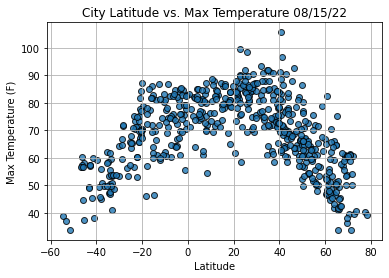

In [48]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

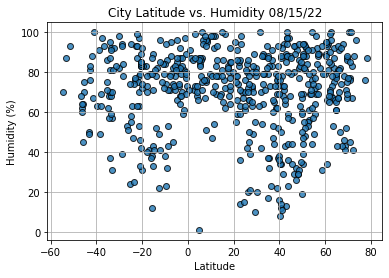

In [49]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

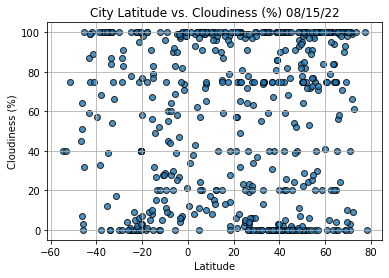

In [50]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

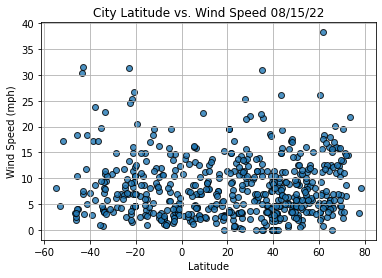

In [51]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [52]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [53]:
index13 = city_data_df.loc[13]

In [54]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Shache,CN,2022-08-16 02:25:23,38.4167,77.2406,74.21,62,100,8.68
1,Albany,US,2022-08-16 02:21:56,42.6001,-73.9662,70.52,64,91,1.97
3,Thompson,CA,2022-08-16 02:25:24,55.7435,-97.8558,71.76,64,75,3.44
4,Batticaloa,LK,2022-08-16 02:25:25,7.7102,81.6924,79.95,75,74,6.98
6,Clyde River,CA,2022-08-16 02:25:25,70.4692,-68.5914,39.43,100,100,19.57


In [55]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

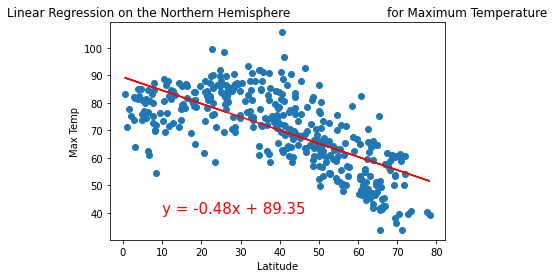

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

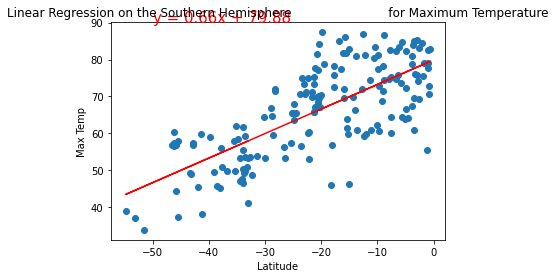

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

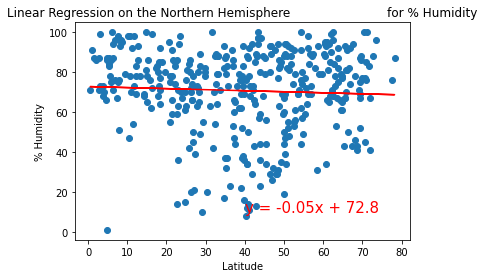

In [60]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

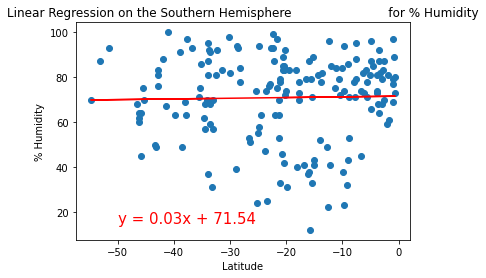

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

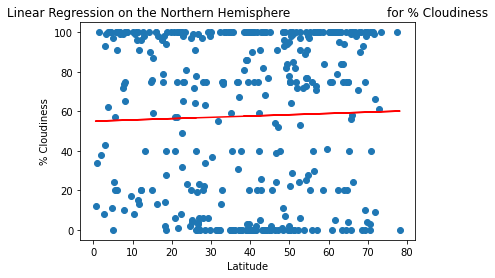

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

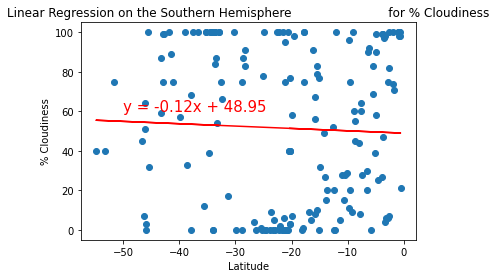

In [63]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

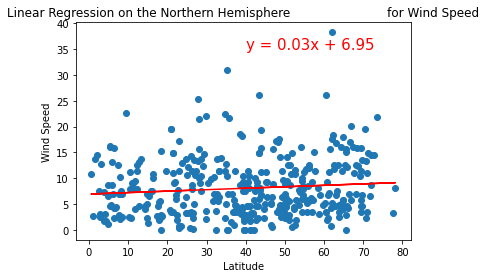

In [64]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

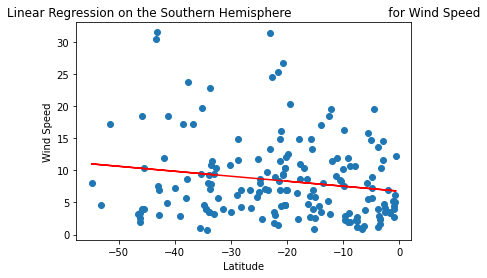

In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))